In [17]:
import numpy as np
import pandas as pd

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVR, LinearSVC
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

from src.datasets import load_run_over_dataset
from src.shadow_learn import ShadowedSetEstimator
from src.metrics import conservative_score, non_conservative_score

In [18]:
random_state = 42

# Macro districts, RFE with RF

In [3]:
dataset_loader = load_run_over_dataset
X, y, data_labels, target, column_names = dataset_loader(target=0, template='macro-districts', without=['DATA'])
column_names

Index(['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Testa:Neurocranio',
       'Testa:Splancnocranio', 'Testa:Telencefalo', 'Testa:Cervelletto',
       'Testa:Tronco encefalico', 'Torace:Polmoni', 'Torace:Trachea/bronchi',
       'Torace:Cuore', 'Torace:Aorta toracica', 'Torace:Diaframma',
       'Addome:Fegato', 'Addome:Milza', 'Addome:Aorta addominale',
       'Addome:Reni', 'Addome:Mesentere', 'Scheletro:Rachide cervicale',
       'Scheletro:Rachide toracico', 'Scheletro:Rachide lombare',
       'Scheletro:Bacino e sacro',
       'Scheletro:Complesso sterno/claveo/costale'],
      dtype='object')

In [4]:
rf = RandomForestClassifier(n_jobs=2, class_weight='balanced', max_depth=5, random_state=random_state)
feat_selector = RFE(rf, verbose=2)
feat_selector.fit(X, y)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFE(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                     n_jobs=2, random_state=42),
    verbose=2)

In [5]:
column_names[feat_selector.support_]

Index(['ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Testa:Neurocranio',
       'Testa:Splancnocranio', 'Torace:Polmoni', 'Torace:Trachea/bronchi',
       'Torace:Cuore', 'Addome:Fegato', 'Addome:Milza',
       'Scheletro:Complesso sterno/claveo/costale'],
      dtype='object')

In [6]:
X.shape, len(feat_selector.support_[feat_selector.support_])

((130, 25), 12)

In [7]:
X_transformed = feat_selector.transform(X)
X_transformed.shape

(130, 12)

# Macro districts, RFE with SVR(linear)

In [8]:
dataset_loader = load_run_over_dataset
X, y, data_labels, target, column_names = dataset_loader(target=0, template='macro-districts', without=['DATA'])
column_names

Index(['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Testa:Neurocranio',
       'Testa:Splancnocranio', 'Testa:Telencefalo', 'Testa:Cervelletto',
       'Testa:Tronco encefalico', 'Torace:Polmoni', 'Torace:Trachea/bronchi',
       'Torace:Cuore', 'Torace:Aorta toracica', 'Torace:Diaframma',
       'Addome:Fegato', 'Addome:Milza', 'Addome:Aorta addominale',
       'Addome:Reni', 'Addome:Mesentere', 'Scheletro:Rachide cervicale',
       'Scheletro:Rachide toracico', 'Scheletro:Rachide lombare',
       'Scheletro:Bacino e sacro',
       'Scheletro:Complesso sterno/claveo/costale'],
      dtype='object')

In [9]:
svr = estimator = SVR(kernel="linear")
feat_selector = RFE(svr, verbose=2)
feat_selector.fit(X, y)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFE(estimator=SVR(kernel='linear'), verbose=2)

In [10]:
column_names[feat_selector.support_]

Index(['SESSO', 'Testa:Neurocranio', 'Testa:Splancnocranio',
       'Torace:Trachea/bronchi', 'Torace:Cuore', 'Torace:Aorta toracica',
       'Addome:Milza', 'Addome:Aorta addominale', 'Addome:Mesentere',
       'Scheletro:Rachide cervicale', 'Scheletro:Rachide lombare',
       'Scheletro:Complesso sterno/claveo/costale'],
      dtype='object')

In [11]:
X.shape, len(feat_selector.support_[feat_selector.support_])

((130, 25), 12)

In [12]:
X_transformed = feat_selector.transform(X)
X_transformed.shape

(130, 12)

# All details, RFE with RF

In [13]:
dataset_loader = load_run_over_dataset
X, y, data_labels, target, column_names = dataset_loader(target=0, template='all-details', without=['DATA'])
column_names

Index(['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Frontale dx',
       'Temporo- Parietale  dx', 'Occipitale dx', 'Frontale sx',
       'Temporo-Parietale sx',
       ...
       'II raggio sx.1', 'III raggio sx.1', 'IV raggio sx.1', 'V raggio sx.1',
       'Art. coxo-femorale dx', 'Art. coxo-femorale sx',
       'Rotula o Ginocchio dx', 'Rotula o Ginocchio sx', 'Caviglia dx',
       'Caviglia sx'],
      dtype='object', length=303)

In [14]:
int(X.shape[1] / 2), X.shape[1]

(151, 303)

In [15]:
rf = RandomForestClassifier(n_jobs=2, class_weight='balanced', max_depth=5, random_state=random_state)
feat_selector = RFE(rf, verbose=2, n_features_to_select=min(20, int(X.shape[1] / 2)))
feat_selector.fit(X, y)

Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
F

Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 fe

RFE(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                     n_jobs=2, random_state=42),
    n_features_to_select=20, verbose=2)

In [16]:
column_names[feat_selector.support_]

Index(['ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Frontale sx', 'Clavicola dx',
       'Linea parasternale dx', 'Linea parasternale dx.2',
       'Linea ascellare posteriore dx.6', 'Linea paravertebrale dx.6',
       'Linea paravertebrale dx.7', 'Linea ascellare media sx.1',
       'Linea paravertebrale sx.2', 'Linea ascellare media sx.3',
       'Linea paravertebrale sx.3', 'Linea ascellare anteriore sx.7',
       'Linea ascellare anteriore sx.9', 'Linea paravertebrale sx.9',
       'Pube dx', 'tibia sx'],
      dtype='object')

In [17]:
X_transformed = feat_selector.transform(X)
X_transformed.shape

(130, 20)

# All details, RFE with SVR(linear)

In [18]:
dataset_loader = load_run_over_dataset
X, y, data_labels, target, column_names = dataset_loader(target=0, template='all-details', without=['DATA'])
column_names

Index(['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Frontale dx',
       'Temporo- Parietale  dx', 'Occipitale dx', 'Frontale sx',
       'Temporo-Parietale sx',
       ...
       'II raggio sx.1', 'III raggio sx.1', 'IV raggio sx.1', 'V raggio sx.1',
       'Art. coxo-femorale dx', 'Art. coxo-femorale sx',
       'Rotula o Ginocchio dx', 'Rotula o Ginocchio sx', 'Caviglia dx',
       'Caviglia sx'],
      dtype='object', length=303)

In [19]:
int(X.shape[1] / 2), X.shape[1]

(151, 303)

In [20]:
svr = SVR(kernel="linear")
feat_selector = RFE(svr, verbose=2, n_features_to_select=min(20, int(X.shape[1] / 2)))
feat_selector.fit(X, y)

Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
F

Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 fe

RFE(estimator=SVR(kernel='linear'), n_features_to_select=20, verbose=2)

In [21]:
column_names[feat_selector.support_]

Index(['Frontale sx', 'T6', 'T10', 'T11', 'Clavicola dx',
       'Linea parasternale dx', 'Linea parasternale dx.2',
       'Linea parasternale dx.5', 'Linea ascellare posteriore dx.6',
       'Linea angolo-scapolare dx.7', 'Linea ascellare anteriore dx.8',
       'Linea ascellare posteriore dx.11', 'Linea ascellare media sx.1',
       'Linea ascellare posteriore sx.5', 'Linea paravertebrale sx.9',
       'Corpo sterno', 'Pube dx', 'Ulna sx', 'Gomito dx', 'femore sx'],
      dtype='object')

In [22]:
X_transformed = feat_selector.transform(X)
X_transformed.shape

(130, 20)

# Estimator selection

In [28]:
# get a list of models to evaluate
def get_rfes(X_features_num):
    models = dict()
    
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['lin_regr'] = rfe
    
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['log_regr'] = rfe
    
    rfe = RFE(estimator=Perceptron(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['perc'] = rfe
    
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['dec_tr'] = rfe
    
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['rnd_for'] = rfe
    
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['grd_boost'] = rfe
    
    rfe = RFE(estimator=SVR(kernel='linear'), n_features_to_select=min(20, int(X_features_num / 2)))
    models['svr'] = rfe
    
    rfe = RFE(estimator=LinearSVC(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['svc'] = rfe
    
    rfe = RFE(estimator=RidgeClassifier(), n_features_to_select=min(20, int(X_features_num / 2)))
    models['ridge'] = rfe
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(feature_selector, X, y, labels, scoring):
    cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    param_grid = {
        'C0': np.concatenate((np.logspace(-2, 1, 5), [])),
        'C1': np.concatenate((np.logspace(-2, 1, 5), [])),
        'sigma': np.concatenate((np.logspace(-1, 2, 5), []))
    }
    gs = GridSearchCV(estimator=ShadowedSetEstimator(),
                      param_grid=param_grid, scoring=scoring,
                      cv=cv_inner, n_jobs=2, verbose=0)
    
    results = []
    
    for train_index, test_index in cv_outer.split(X, labels):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        feature_selector.fit(X_train, y_train)
        X_train = feature_selector.transform(X_train)
        X_test = feature_selector.transform(X_test)
        
        gs.fit(X_train, y_train)
        final_model = gs.best_estimator_
        results.append(scoring(final_model, X_test, y_test))
        
    return np.array(results)

## Macro districts (conservative)

>lin_regr 0.600 (0.083)
scores: [0.73076923 0.5        0.57692308 0.65384615 0.53846154]
>log_regr 0.615 (0.073)
scores: [0.73076923 0.53846154 0.53846154 0.61538462 0.65384615]
>perc 0.669 (0.071)
scores: [0.73076923 0.61538462 0.76923077 0.57692308 0.65384615]
>dec_tr 0.577 (0.073)
scores: [0.61538462 0.5        0.69230769 0.5        0.57692308]
>rnd_for 0.600 (0.090)
scores: [0.73076923 0.46153846 0.65384615 0.57692308 0.57692308]
>grd_boost 0.638 (0.058)
scores: [0.69230769 0.53846154 0.69230769 0.65384615 0.61538462]
>svr 0.669 (0.062)
scores: [0.73076923 0.61538462 0.73076923 0.57692308 0.69230769]


D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number o

>svc 0.600 (0.071)
scores: [0.73076923 0.53846154 0.57692308 0.61538462 0.53846154]
>ridge 0.623 (0.066)
scores: [0.73076923 0.53846154 0.57692308 0.61538462 0.65384615]


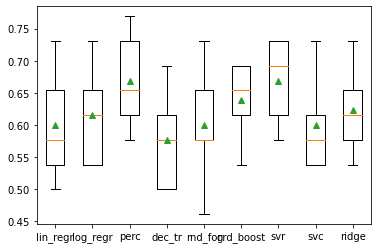

In [29]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='macro-districts', without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Macro districts (non-conservative)

>lin_regr 0.585 (0.045)
scores: [0.65384615 0.53846154 0.57692308 0.61538462 0.53846154]
>log_regr 0.592 (0.052)
scores: [0.61538462 0.57692308 0.5        0.61538462 0.65384615]
>perc 0.654 (0.064)
scores: [0.73076923 0.61538462 0.73076923 0.57692308 0.61538462]
>dec_tr 0.608 (0.078)
scores: [0.69230769 0.5        0.69230769 0.53846154 0.61538462]
>rnd_for 0.638 (0.039)
scores: [0.65384615 0.57692308 0.65384615 0.69230769 0.61538462]
>grd_boost 0.615 (0.054)
scores: [0.57692308 0.53846154 0.69230769 0.65384615 0.61538462]
>svr 0.708 (0.062)
scores: [0.80769231 0.69230769 0.73076923 0.61538462 0.69230769]


D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number o

>svc 0.585 (0.029)
scores: [0.61538462 0.57692308 0.57692308 0.61538462 0.53846154]
>ridge 0.608 (0.029)
scores: [0.61538462 0.57692308 0.57692308 0.61538462 0.65384615]


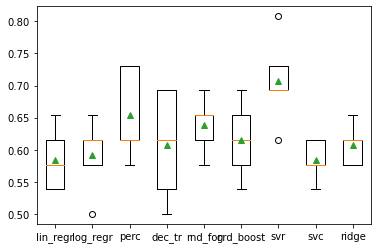

In [30]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='macro-districts', without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(non_conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## All-details (conservative)

Dopo 5 ore rnd_for non ha ancora dato risultato. Log_regr ci ha messo un'ora. Tolta feature_selection in cv.

>lin_regr 0.646 (0.078)
scores: [0.53846154 0.57692308 0.73076923 0.73076923 0.65384615]
>log_regr 0.646 (0.089)
scores: [0.61538462 0.5        0.69230769 0.65384615 0.76923077]
>perc 0.708 (0.086)
scores: [0.61538462 0.65384615 0.76923077 0.65384615 0.84615385]
>dec_tr 0.615 (0.100)
scores: [0.5        0.69230769 0.76923077 0.53846154 0.57692308]
>rnd_for 0.677 (0.071)
scores: [0.61538462 0.69230769 0.76923077 0.57692308 0.73076923]
>grd_boost 0.677 (0.093)
scores: [0.61538462 0.69230769 0.73076923 0.53846154 0.80769231]
>svr 0.646 (0.078)
scores: [0.61538462 0.53846154 0.69230769 0.61538462 0.76923077]


D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number o

>svc 0.608 (0.075)
scores: [0.53846154 0.53846154 0.73076923 0.57692308 0.65384615]
>ridge 0.700 (0.075)
scores: [0.57692308 0.80769231 0.69230769 0.69230769 0.73076923]


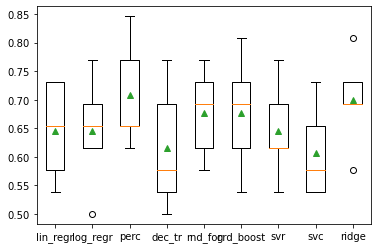

In [31]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='all-details', without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## All-details (non-conservative)

>lin_regr 0.646 (0.078)
scores: [0.53846154 0.57692308 0.73076923 0.73076923 0.65384615]
>log_regr 0.600 (0.093)
scores: [0.57692308 0.5        0.61538462 0.53846154 0.76923077]
>perc 0.669 (0.118)
scores: [0.61538462 0.53846154 0.76923077 0.57692308 0.84615385]
>dec_tr 0.646 (0.075)
scores: [0.53846154 0.61538462 0.73076923 0.73076923 0.61538462]
>rnd_for 0.615 (0.054)
scores: [0.61538462 0.57692308 0.69230769 0.53846154 0.65384615]
>grd_boost 0.662 (0.092)
scores: [0.61538462 0.61538462 0.76923077 0.53846154 0.76923077]
>svr 0.600 (0.083)
scores: [0.57692308 0.5        0.65384615 0.53846154 0.73076923]


D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number o

>svc 0.608 (0.092)
scores: [0.5        0.53846154 0.61538462 0.61538462 0.76923077]
>ridge 0.654 (0.100)
scores: [0.57692308 0.80769231 0.61538462 0.53846154 0.73076923]


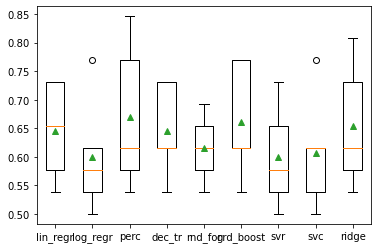

In [32]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='all-details', without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(non_conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Macro districts, from 2008 (conservative)

>lin_regr 0.660 (0.068)
scores: [0.57894737 0.66666667 0.61111111 0.77777778 0.66666667]
>log_regr 0.649 (0.050)
scores: [0.57894737 0.66666667 0.61111111 0.66666667 0.72222222]
>perc 0.661 (0.106)
scores: [0.52631579 0.55555556 0.66666667 0.77777778 0.77777778]
>dec_tr 0.627 (0.082)
scores: [0.52631579 0.72222222 0.61111111 0.72222222 0.55555556]
>rnd_for 0.639 (0.066)
scores: [0.52631579 0.66666667 0.61111111 0.66666667 0.72222222]
>grd_boost 0.660 (0.120)
scores: [0.57894737 0.55555556 0.66666667 0.88888889 0.61111111]
>svr 0.639 (0.083)
scores: [0.52631579 0.55555556 0.72222222 0.72222222 0.66666667]
>svc 0.649 (0.086)
scores: [0.57894737 0.61111111 0.72222222 0.77777778 0.55555556]
>ridge 0.638 (0.087)
scores: [0.57894737 0.66666667 0.5        0.72222222 0.72222222]


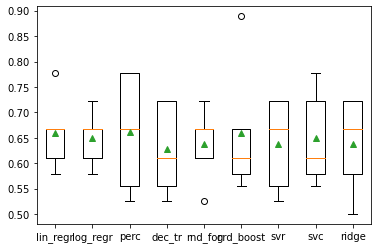

In [24]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='macro-districts', from_year=2008, without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Macro districts, from 2008 (non-conservative)

>lin_regr 0.694 (0.067)
scores: [0.57894737 0.72222222 0.66666667 0.72222222 0.77777778]
>log_regr 0.660 (0.068)
scores: [0.57894737 0.61111111 0.66666667 0.66666667 0.77777778]
>perc 0.672 (0.097)
scores: [0.52631579 0.61111111 0.66666667 0.77777778 0.77777778]
>dec_tr 0.661 (0.087)
scores: [0.52631579 0.72222222 0.61111111 0.77777778 0.66666667]
>rnd_for 0.704 (0.050)
scores: [0.63157895 0.72222222 0.72222222 0.77777778 0.66666667]
>grd_boost 0.660 (0.072)
scores: [0.63157895 0.66666667 0.66666667 0.77777778 0.55555556]
>svr 0.705 (0.105)
scores: [0.52631579 0.66666667 0.77777778 0.72222222 0.83333333]
>svc 0.694 (0.084)
scores: [0.57894737 0.66666667 0.66666667 0.72222222 0.83333333]
>ridge 0.694 (0.067)
scores: [0.57894737 0.72222222 0.66666667 0.72222222 0.77777778]


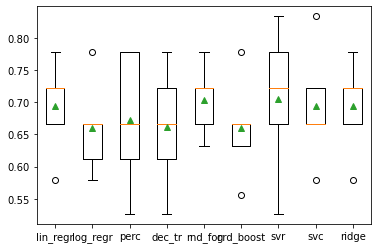

In [25]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='macro-districts', from_year=2008, without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(non_conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## All-details, from 2008 (conservative)

>lin_regr 0.669 (0.096)
scores: [0.78947368 0.72222222 0.72222222 0.55555556 0.55555556]
>log_regr 0.713 (0.045)
scores: [0.78947368 0.66666667 0.66666667 0.72222222 0.72222222]
>perc 0.680 (0.077)
scores: [0.78947368 0.66666667 0.66666667 0.55555556 0.72222222]
>dec_tr 0.648 (0.084)
scores: [0.68421053 0.66666667 0.55555556 0.55555556 0.77777778]
>rnd_for 0.657 (0.126)
scores: [0.89473684 0.55555556 0.66666667 0.61111111 0.55555556]
>grd_boost 0.626 (0.068)
scores: [0.68421053 0.5        0.66666667 0.61111111 0.66666667]
>svr 0.671 (0.058)
scores: [0.63157895 0.77777778 0.66666667 0.66666667 0.61111111]


D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


>svc 0.647 (0.094)
scores: [0.78947368 0.72222222 0.55555556 0.61111111 0.55555556]
>ridge 0.636 (0.079)
scores: [0.73684211 0.72222222 0.55555556 0.55555556 0.61111111]


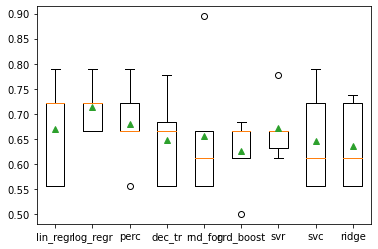

In [26]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='all-details', from_year=2008, without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## All-details, from 2008 (non-conservative)

>lin_regr 0.635 (0.154)
scores: [0.89473684 0.72222222 0.5        0.55555556 0.5       ]
>log_regr 0.691 (0.049)
scores: [0.78947368 0.66666667 0.66666667 0.66666667 0.66666667]
>perc 0.702 (0.099)
scores: [0.78947368 0.83333333 0.66666667 0.55555556 0.66666667]
>dec_tr 0.691 (0.086)
scores: [0.78947368 0.66666667 0.66666667 0.55555556 0.77777778]
>rnd_for 0.680 (0.085)
scores: [0.84210526 0.66666667 0.61111111 0.66666667 0.61111111]
>grd_boost 0.691 (0.093)
scores: [0.84210526 0.66666667 0.55555556 0.66666667 0.72222222]
>svr 0.724 (0.081)
scores: [0.84210526 0.77777778 0.66666667 0.61111111 0.72222222]


D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


>svc 0.691 (0.060)
scores: [0.78947368 0.72222222 0.66666667 0.61111111 0.66666667]
>ridge 0.658 (0.116)
scores: [0.78947368 0.66666667 0.44444444 0.72222222 0.66666667]


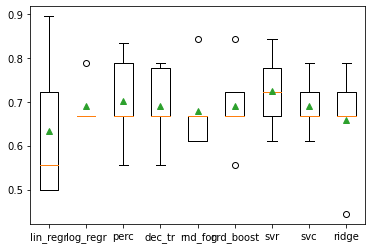

In [27]:
X, y, data_labels, target, column_names = load_run_over_dataset(target=0, template='all-details', from_year=2008, without=['DATA'])
# get the models to evaluate
rfes = get_rfes(X.shape[1])
# evaluate the models and store results
results, names = list(), list()
for name, rfe in rfes.items():
    scores = evaluate_model(rfe, X, y, data_labels, make_scorer(non_conservative_score))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    print('scores: ' + str(scores))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()